## AIM-5011-1
## By Zeyu Wang
## Fall 2021

In [277]:
import pandas as pd
import re
import numpy as np

# A.Naive bayes

## 1. Load data

The data comes from Kaggle. It's about the Sentiment Analysis for Financial News. I will achieve a naive bayesian algorithm on this dataset.

In [278]:
data = pd.read_csv('https://raw.githubusercontent.com/NewThread-ZY/AIM-5011-1/main/all-data.csv', encoding = "ISO-8859-1")

In [279]:
data

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


## 2. Clean data

I will pick up data that only with a positive and negative labels from this dataset.

In [280]:
data1 = (data[(data.neutral == 'positive') | (data.neutral == 'negative')]).copy()#delete neutral lable datas

In [281]:
data1.columns = ['label', 'text']#change the columns name

In [282]:
data1 = data1.reset_index(drop = True)#reset index
data1

,label,text
0,negative,The international electronic industry company ...
1,positive,With the new production plant the company woul...
2,positive,According to the company 's updated strategy f...
3,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
4,positive,"For the last quarter of 2010 , Componenta 's n..."
...,...,...
1962,negative,HELSINKI Thomson Financial - Shares in Cargote...
1963,negative,LONDON MarketWatch -- Share prices ended lower...
1964,negative,Operating profit fell to EUR 35.4 mn from EUR ...
1965,negative,Net sales of the Paper segment decreased to EU...


In [283]:
data1.label = data1.label.map(dict(positive=1, negative=0))# let positive = 1 and negative=0
data1

,label,text
0,0,The international electronic industry company ...
1,1,With the new production plant the company woul...
2,1,According to the company 's updated strategy f...
3,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
4,1,"For the last quarter of 2010 , Componenta 's n..."
...,...,...
1962,0,HELSINKI Thomson Financial - Shares in Cargote...
1963,0,LONDON MarketWatch -- Share prices ended lower...
1964,0,Operating profit fell to EUR 35.4 mn from EUR ...
1965,0,Net sales of the Paper segment decreased to EU...


In [284]:
p_negative = len(data1[data1.label==0])/len(data1)
p_negative

0.3070665988815455

In [285]:
p_positive = len(data1[data1.label==1])/len(data1)
p_positive

0.6929334011184545

There are nearly 30% datas are negative and nearly 70% datas are positive.

### Lowercase the word and remove the comma and period.

In [286]:
def lowercaseAndRemoveComa(x):
    x = x.lower()
    x = x.replace(',', '')
    x = x.replace('.', '')
    x = x.replace('-', '')
    x = x.replace('\'s', '')
    x = x.replace('%', '')
    pattern = r'[0-9]'
    x = re.sub(pattern, '', x)
    return x

In [287]:
data1.text = data1.text.apply(lambda x: lowercaseAndRemoveComa(x))
data1

,label,text
0,0,the international electronic industry company ...
1,1,with the new production plant the company woul...
2,1,according to the company updated strategy for...
3,1,financing of aspocomp growth aspocomp is aggr...
4,1,for the last quarter of componenta net sale...
...,...,...
1962,0,helsinki thomson financial shares in cargotec...
1963,0,london marketwatch share prices ended lower i...
1964,0,operating profit fell to eur mn from eur mn ...
1965,0,net sales of the paper segment decreased to eu...


## split the data into traning data and test data

In [288]:
train_num = int(0.9*len(data1))

In [289]:
train = data1.iloc[0:train_num, :]
test = data1.iloc[train_num:, :]

## 3. Build naive bayes model

In this model, I will calculate prior probability and count the times of word appear in different documents and multiple them and divide by the number of their documents' corpus. Then compare these two probabilities. If the probability of positive is greater than the probability of negative, the prediction will be positive. Otherwise, the predicted result will be negative. This is a method base on TF-IDF.

In [320]:
def Naive_Bayes(data, test):
    prior_positive = len(data[data.label == 1])/len(data)
    prior_negative = len(data[data.label == 0])/len(data)
    D_word = []
    for i in range(len(data)):
        D_word.extend(data.text[i].split(' '))
    D_word = list(set(D_word))
    bigdoc_positive = []
    bigdoc_negative = []
    positive_data = (data[data.label==1]).copy()
    negative_data = (data[data.label==0]).copy()
    for i in range(len(positive_data)):
        bigdoc_positive.append( list(set((positive_data.text.iloc[i]).split(' '))) )
    for i in range(len(negative_data)):
        bigdoc_negative.append( list(set((negative_data.text.iloc[i]).split(' ')))  )
    predict_label = []
    positive_only_word_times = list(set([o for l in bigdoc_positive for o in l]))# the data from bigdoc_positive but only appear one time
    negative_only_word_times = list(set([o for l in bigdoc_negative for o in l]))# the data from bigdoc_negative but only appear one time
    predict_probility = []
    for i in range(len(test)):
        text_s = (test.text.iloc[i]).split(' ')
        text_times_every_word_pos = 1
        text_times_every_word_neg = 1
        p_sentense_positive = 1#probility for each sentence is positive
        p_sentense_negative = 1#probility for each sentence is negative
        #naive bayes positive calculate
        word_exist_in_training_data = 0# record how many word exist in training dataset in test each sentence
        
        for j in text_s:
            word_count_positive = 1
            word_count_negative = 1
            if j in D_word:# if the word isn't exist in training data, we ignore it
                word_exist_in_training_data+=1
            else:
                continue
                
                
            #positive
            for k in bigdoc_positive:#Using Binary Counts
                if j in k:
                    word_count_positive+=1
            text_times_every_word_pos*=word_count_positive
            
            #negative
            for k in bigdoc_negative:#Using Binary Counts
                if j in k:
                    word_count_negative+=1
            text_times_every_word_neg*=word_count_negative
            
            
        #Bayes formula    
        p_sentense_positive = np.log(prior_positive*text_times_every_word_pos/((len(positive_only_word_times)+len(D_word))**word_exist_in_training_data))
        p_sentense_negative = np.log(prior_negative*text_times_every_word_neg/((len(negative_only_word_times)+len(D_word))**word_exist_in_training_data))
        predict_probility.append([p_sentense_positive/(p_sentense_positive+p_sentense_negative),p_sentense_negative/(p_sentense_positive+p_sentense_negative)])
        if p_sentense_positive>p_sentense_negative:
            predict_label.append(1)
        else:
            predict_label.append(0)
    return predict_label, predict_probility

In [321]:
predict_label, predict_probility = Naive_Bayes(train, test)

## 4. Accuracy and confusion matrix

In [205]:
test_np = np.array(test.label)
predict_test_np = np.array(predict_label)

In [208]:
len(test_np[test_np==predict_test_np])/len(test_np)

0.03553299492385787

In [209]:
predict_label_train = Naive_Bayes(train, train)

In [210]:
train_np = np.array(train.label)
predict_label_train = np.array(predict_label_train)

In [211]:
len(train_np[train_np==predict_label_train])/len(train_np)

0.7790960451977401

### train data

In [212]:
Confusion_Matrix_train = [[0, 0],[0, 0]]

In [214]:
for i in range(len(train_np)):
    if train_np[i] == 1 and predict_label_train[i] == 1:
        Confusion_Matrix_train[0][0] += 1
    elif train_np[i] == 0 and predict_label_train[i] == 1:
        Confusion_Matrix_train[0][1] += 1
    elif train_np[i] == 1 and predict_label_train[i] == 0:
        Confusion_Matrix_train[1][0] += 1
    elif train_np[i] == 0 and predict_label_train[i] == 0:
        Confusion_Matrix_train[1][1] += 1

In [215]:
Confusion_Matrix_train

[[1356, 391], [0, 23]]

In [216]:
recall_train = Confusion_Matrix_train[0][0]/(Confusion_Matrix_train[0][0]+Confusion_Matrix_train[1][0])
recall_train

1.0

### Test data

In [217]:
Confusion_Matrix_test = [[0, 0],[0, 0]]

In [219]:
for i in range(len(test_np)):
    if test_np[i] == 1 and predict_test_np[i] == 1:
        Confusion_Matrix_test[0][0] += 1
    elif test_np[i] == 0 and predict_test_np[i] == 1:
        Confusion_Matrix_test[0][1] += 1
    elif test_np[i] == 1 and predict_test_np[i] == 0:
        Confusion_Matrix_test[1][0] += 1
    elif test_np[i] == 0 and predict_test_np[i] == 0:
        Confusion_Matrix_test[1][1] += 1

In [220]:
Confusion_Matrix_test

[[14, 380], [0, 0]]

In [221]:
recall_test = Confusion_Matrix_train[0][0]/(Confusion_Matrix_train[0][0]+Confusion_Matrix_train[1][0])
recall_test

1.0

It means the naive Bayes model doesn't fit well here. We can try to balance the data first and use some methods to split the negative sentence and positive. For example, if a sentence is negative, it's different from positive just is don't but other words are the same. We need to add a negative prefix for other words.

# B.LR model

In this method, I will let the dataset be decode like the one-hot decode. Then use the Logistic regression model to fit and predict it.

In [243]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model

In [226]:
corpus = list(train.text)

In [232]:
vectorizer = CountVectorizer(binary=True, min_df = 5, max_df = 0.95)

In [235]:
vectorizer.fit_transform(corpus)

<1770x949 sparse matrix of type '<class 'numpy.int64'>'
	with 24477 stored elements in Compressed Sparse Row format>

In [236]:
train_vc = vectorizer.transform(train.text)
test_vc = vectorizer.transform(test.text)

In [247]:
train_vc.shape[0]

1770

In [245]:
logitstic = linear_model.LogisticRegression(solver = 'liblinear', random_state = 10, max_iter=1000)

In [248]:
logitstic.fit(train_vc,train.label)

LogisticRegression(max_iter=1000, random_state=10, solver='liblinear')

In [249]:
train_predict_label = logitstic.predict(train_vc)

In [250]:
test_predict_label = logitstic.predict(test_vc)

In [253]:
print(f'The accuracy of train = {len(train_predict_label[train_predict_label==np.array(train.label)])/len(train_predict_label)}')

The accuracy of train = 0.9621468926553672


In [254]:
print(f'The accuracy of test = {len(test_predict_label[test_predict_label==np.array(test.label)])/len(test_predict_label)}')

The accuracy of test = 0.5736040609137056


### The confusion matrix and recall value of train dataset

In [255]:
Confusion_Matrix_train_lr = [[0, 0],[0, 0]]
for i in range(len(np.array(train.label))):
    if np.array(train.label)[i] == 1 and train_predict_label[i] == 1:
        Confusion_Matrix_train_lr[0][0] += 1
    elif np.array(train.label)[i] == 0 and train_predict_label[i] == 1:
        Confusion_Matrix_train_lr[0][1] += 1
    elif np.array(train.label)[i] == 1 and train_predict_label[i] == 0:
        Confusion_Matrix_train_lr[1][0] += 1
    elif np.array(train.label)[i] == 0 and train_predict_label[i] == 0:
        Confusion_Matrix_train_lr[1][1] += 1

In [256]:
Confusion_Matrix_train_lr

[[1338, 49], [18, 365]]

In [257]:
recall_train_lr = Confusion_Matrix_train_lr[0][0]/(Confusion_Matrix_train_lr[0][0]+Confusion_Matrix_train_lr[1][0])
recall_train_lr

0.9867256637168141

### The confusion matrix and recall value of test dataset

In [258]:
Confusion_Matrix_test_lr = [[0, 0],[0, 0]]
for i in range(len(np.array(test.label))):
    if np.array(test.label)[i] == 1 and test_predict_label[i] == 1:
        Confusion_Matrix_test_lr[0][0] += 1
    elif np.array(test.label)[i] == 0 and test_predict_label[i] == 1:
        Confusion_Matrix_test_lr[0][1] += 1
    elif np.array(test.label)[i] == 1 and test_predict_label[i] == 0:
        Confusion_Matrix_test_lr[1][0] += 1
    elif np.array(test.label)[i] == 0 and test_predict_label[i] == 0:
        Confusion_Matrix_test_lr[1][1] += 1

In [259]:
Confusion_Matrix_test_lr

[[7, 84], [0, 106]]

In [260]:
recall_test_lr = Confusion_Matrix_test_lr[0][0]/(Confusion_Matrix_test_lr[0][0]+Confusion_Matrix_test_lr[1][0])
recall_test_lr

1.0

Conclusion: Here in this Financial News, logistic regression has a higher accuracy whatever in train data or test data predict. In using the naive base algorithm, the model appears less fitting. In the LR model, it looks like overfitting. Here bootstrapping may deal with this problem.

# C. POC curve

In [346]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [347]:
y_pred_proba_test = logitstic.predict_proba(test_vc)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [348]:
predict_probility = np.array(predict_probility)

In [349]:
fpr_bayes, tpr_bayes, _ = metrics.roc_curve(test.label,  predict_probility)

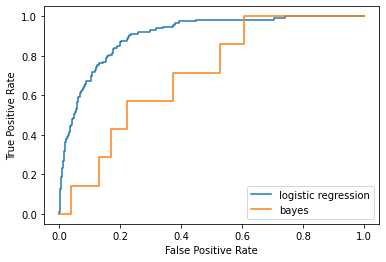

In [350]:
plt.plot(fpr,tpr, label = "logistic regression")
plt.plot(fpr_bayes,tpr_bayes, label = "bayes")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

From the roc plot, we can see that the logistic regression model has a better performance than naive Bayes.

Conclusion: In this case, I used naive Bayes to do Sentiment Analysis with TF-IDF and use logistic regression model without TF-IDF. By comparing the results of these two models, the logistic regression model has a better performance than naive Bayes.

What word cloud(s) would be informative here?
In naive Bayes, word cloud will be used to calculate the appearance times of the predicted word. In the LR model, word cloud will be used to extract the feature by the LR model. 

Maybe we can use software rather than the sigmoid to predict multiple classes Sentiment Analysis. And in the Naive Bayes model, it doesn't have a good result and maybe we can remove the stop word although the book says that it doesn't word.